# Visualization of data and model performance

## Error bars
- Use std. deviation to indicate uncertainty
- Error bar = std.dev values
- Use pandas to "filter" data on criteria (environment)
- Then for that environment - plot line plot with error bar -
- For a single column say A2C Precision

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Utility functions

In [132]:
# Write heading to summary performance file
def write_heading(heading, report_file):
    from csv import writer
    with open(report_file, 'a', newline='') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(heading)
        f_object.close()

# Write summary performance to file
def write_perf_metrics(heading, metrics, report_file, round_decimals=8):
    from pathlib import Path
    
    write_heading([''], report_file)  
    write_heading(heading, report_file)   
    report_file = Path(report_file)
    report_file.parent.mkdir(parents=True, exist_ok=True)
    metrics = metrics.round(round_decimals)
    metrics.to_csv(report_file, mode='a')
    
    write_heading(['-----------------------------------------------------------------------'], report_file)  

In [133]:
# Draw error bar plots across all training rounds
def error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend):
    TIME_STEP_TICK = 1
    X_LOW = -0.25
    X_UPPER = len(x)
    Y_LOW = 0.0
    Y_UPPER = 1.1
    Y_GRID = 0.25

    ax.errorbar(x, y, yerr=y_err, fmt='-o', alpha=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title, fontsize=12)
    ax.set(ylim=[Y_LOW, Y_UPPER])
    ax.set_xticks(np.arange(0, X_UPPER, TIME_STEP_TICK))
    ax.set_xticklabels(x[::TIME_STEP_TICK], fontdict={'fontsize':10})
    
    ax.grid(alpha=0.25)
    ax.spines["top"].set_alpha(0)
    ax.spines["bottom"].set_alpha(.3)
    ax.spines["right"].set_alpha(0)
    ax.spines["left"].set_alpha(.3)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(legend, loc='center left', bbox_to_anchor=(1, 0.8))
    pdf_file = title.replace('-', '')
    pdf_file = pdf_file.replace(' ', '_')
    fig.savefig(f'{pdf_file}.pdf', bbox_inches='tight')

In [134]:
# Draw multi-line plots for all algorithms
def multi_algorithm_plot(env_subset, env_label):
    # Create a figure with 1 row and 3 cols of subplots
    PLOT_H = 3
    PLOT_W = 20

    # define the standard algorithms and labels
    metric_key = ['Pr', 'Rc', 'F1', 'F05']
    algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
    algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}
    metrics = {'Pr':'Precision', 'Rc':'Recall', 'F1':'F-1 score', 'F05':'F-beta 0.5'}

    # X axis is fixed
    x_label = 'Training round'
    legend = algo_keys
    
    metrics_df = []
    
    for m in range(len(metric_key)):
        # Multi-line plots
        fig, ax = plt.subplots()

        fig.set_figheight(PLOT_H)
        fig.set_figwidth(PLOT_W)

        # axes = [ax1, ax2, ax3, ax4]
        for n in range(len(algo_keys)):
            m_key = metric_key[m]
            key = algos[algo_keys[n]] 
            mr_key = f'{key}_{m_key}'
            mr_sd_key = f'{key}_{m_key}_sd'
            mr = env_subset.groupby(['Round']).agg({mr_key :['mean']})
            mr_sd = env_subset.groupby(['Round']).agg({mr_sd_key :['mean']})

            y = mr.to_numpy().flatten().tolist()
            y_err = mr_sd.to_numpy().flatten().tolist()        
            y_label = metrics[m_key]
            title = f'{env_label} - {y_label}'

            x = [i for i in range(len(y))]
            error_plot(fig, ax, x, y, y_err, title, y_label, x_label, legend)            


In [135]:
def compute_aggregated_metrics(df):
    metrics = df.groupby(['environment_info']).agg(
        {'RF_Pr': ['mean'], 'RF_Rc': ['mean'],'RF_F1': ['mean'], 'RF_F05': ['mean'],
         'A2C_Pr': ['mean'], 'A2C_Rc': ['mean'],'A2C_F1': ['mean'], 'A2C_F05': ['mean'],
         'DQN_Pr': ['mean'], 'DQN_Rc': ['mean'],'DQN_F1': ['mean'], 'DQN_F05': ['mean'],
         'PPO_Pr': ['mean'], 'PPO_Rc': ['mean'],'PPO_F1': ['mean'], 'PPO_F05': ['mean'],

         'RF_Pr_sd': ['mean'], 'RF_Rc_sd': ['mean'],'RF_F1_sd': ['mean'], 'RF_F05_sd': ['mean'],
         'A2C_Pr_sd': ['mean'], 'A2C_Rc_sd': ['mean'],'A2C_F1_sd': ['mean'], 'A2C_F05_sd': ['mean'],
         'DQN_Pr_sd': ['mean'], 'DQN_Rc_sd': ['mean'],'DQN_F1_sd': ['mean'], 'DQN_F05_sd': ['mean'],
         'PPO_Pr_sd': ['mean'], 'PPO_Rc_sd': ['mean'],'PPO_F1_sd': ['mean'], 'PPO_F05_sd': ['mean']

        })
    return(metrics)

# Concat experiment files

In [136]:
import glob
PATH = './results/Expt_Reports/'
EXPT_REPORTS = f'{PATH}/Experiment_Results_*.csv'
CONCAT_REPORT = f'{PATH}/Concat_Experiments_07-Jul-2023.csv'
performance_file = f'{PATH}/Performance_Metrics_07-Jul-2023.csv'
CONSOLIDATED_PERFORMANCE_REPORT = f'{PATH}/Consolidated_Summary_07-Jul-2023.csv'

report_files = glob.glob(EXPT_REPORTS)

In [137]:
print(len(report_files))
report_files

10


['./results/Expt_Reports\\Experiment_Results_R1_0_5_0.csv',
 './results/Expt_Reports\\Experiment_Results_R1_0_5_1.csv',
 './results/Expt_Reports\\Experiment_Results_R1_0_5_2.csv',
 './results/Expt_Reports\\Experiment_Results_R1_0_5_3.csv',
 './results/Expt_Reports\\Experiment_Results_R1_0_5_4.csv',
 './results/Expt_Reports\\Experiment_Results_R2_5_15_5.csv',
 './results/Expt_Reports\\Experiment_Results_R2_5_15_6.csv',
 './results/Expt_Reports\\Experiment_Results_R2_5_15_7.csv',
 './results/Expt_Reports\\Experiment_Results_R2_5_15_8.csv',
 './results/Expt_Reports\\Experiment_Results_R2_5_15_9.csv']

In [138]:
# Reset Round columns
dfes = [pd.read_csv(f, header = 0) for f in report_files]
df_report = pd.concat(dfes)
df_report.to_csv(CONCAT_REPORT)

### Add 'Round' column

In [139]:
# Reset Round columns
dfes = []
r = 0
for f in report_files:
    print(f'Adding Round {r}')
    dfe = pd.read_csv(f, header = 0)
    dfe['Round'] = r
    dfes.append(dfe)
    r += 1

df_report = pd.concat(dfes)
df_report.to_csv(CONCAT_REPORT)

df_report = pd.read_csv(CONCAT_REPORT)
df_report = df_report.sample(frac = 1)

Adding Round 0
Adding Round 1
Adding Round 2
Adding Round 3
Adding Round 4
Adding Round 5
Adding Round 6
Adding Round 7
Adding Round 8
Adding Round 9


In [140]:
algo_metrics = compute_aggregated_metrics(df_report)
algo_metrics.to_csv(CONSOLIDATED_PERFORMANCE_REPORT)
print(f'* Done. {len(report_files)} Experiment files summarized and environment level metrics computed')

* Done. 10 Experiment files summarized and environment level metrics computed


In [141]:
# Import Data
df = pd.read_csv(CONCAT_REPORT)
# df = pd.read_csv('R1-Concat_Experiments.csv')
print('Experiments data imported. Number of records: ', len(df.index),'\n')

# Find unique environments
envs = df.environment_info.unique()
n_envs = len(envs)
print(f'Unique environments: {n_envs}\n {envs}')

Experiments data imported. Number of records:  150 

Unique environments: 15
 ['Simulated NBD' 'Simulated LBD' 'Simulated HBD' 'PHM C01 SS NBD'
 'PHM C01 SS LBD' 'PHM C01 SS HBD' 'PHM C04 SS NBD' 'PHM C04 SS LBD'
 'PHM C04 SS HBD' 'PHM C06 SS NBD' 'PHM C06 SS LBD' 'PHM C06 SS HBD'
 'PHM C01 MS NBD' 'PHM C04 MS NBD' 'PHM C06 MS NBD']


In [142]:
all_envs = df

simulated_env = df[(df['environment_info'] == envs[0]) |  (df['environment_info'] == envs[1]) | (df['environment_info'] == envs[2])]

ss_env = df[(df['environment_info'] == envs[3]) |  (df['environment_info'] == envs[4])  | (df['environment_info'] == envs[5]) |
            (df['environment_info'] == envs[6]) |  (df['environment_info'] == envs[7])  | (df['environment_info'] == envs[8]) |
            (df['environment_info'] == envs[9]) |  (df['environment_info'] == envs[10]) | (df['environment_info'] == envs[11])]

ms_env = df[(df['environment_info'] == envs[12]) |  (df['environment_info'] == envs[13]) | (df['environment_info'] == envs[14])]

print(f'Total Simple-State:  Simulated: {len(simulated_env)} SS: {len(ss_env)}')
print(f'Total Multi-variate: MS: {len(ms_env)}')

Total Simple-State:  Simulated: 30 SS: 90
Total Multi-variate: MS: 30


In [143]:
overall_performance = compute_performance_df(all_envs)
simulated_performance = compute_performance_df(simulated_env)
phm_ss_performance = compute_performance_df(ss_env)
phm_ms_performance = compute_performance_df(ms_env)

In [144]:
overall_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6868,0.0594,0.6292,0.0509,0.6092,0.0497,0.6306,0.0518
A2C,0.4488,0.0875,0.4795,0.0839,0.4417,0.0704,0.4358,0.0712
DQN,0.4176,0.1848,0.5041,0.0321,0.3740,0.0354,0.3475,0.0575
PPO,0.4721,0.1444,0.3156,0.0867,0.3449,0.0910,0.3929,0.1046


In [145]:
simulated_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.8059,0.0397,0.9153,0.0375,0.8414,0.0354,0.8156,0.0369
A2C,0.4155,0.1201,0.3848,0.0727,0.3626,0.0717,0.3733,0.0821
DQN,0.4315,0.1835,0.5100,0.0313,0.3738,0.0344,0.3508,0.0562
PPO,0.4998,0.1779,0.2145,0.0814,0.2845,0.0993,0.3704,0.1221


In [146]:
phm_ss_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6050,0.0462,0.6033,0.0460,0.5698,0.0410,0.5762,0.0403
A2C,0.4473,0.0771,0.4769,0.0905,0.4524,0.0724,0.4461,0.0697
DQN,0.4192,0.1788,0.5067,0.0323,0.3786,0.0357,0.3517,0.0572
PPO,0.4497,0.1459,0.3139,0.0815,0.3330,0.0866,0.3741,0.1017


In [147]:
phm_ms_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.8128,0.1187,0.4207,0.0789,0.4949,0.0898,0.6087,0.1010
A2C,0.4867,0.0861,0.5820,0.0754,0.4884,0.0634,0.4673,0.0651
DQN,0.3989,0.2041,0.4907,0.0324,0.3605,0.0354,0.3316,0.0598
PPO,0.5115,0.1067,0.4215,0.1074,0.4408,0.0958,0.4715,0.0956


In [148]:
C01 = df[df['environment_info'].str.contains('C01')]
C04 = df[df['environment_info'].str.contains('C04')]
C06 = df[df['environment_info'].str.contains('C06')]

In [149]:
NBD = df[df['environment_info'].str.contains('NBD')]
LBD = df[df['environment_info'].str.contains('LBD')]
HBD = df[df['environment_info'].str.contains('HBD')]

In [150]:
# all_envs = df

# simulated_env = df[(df['environment_info'] == envs[3]) |  (df['environment_info'] == envs[4]) | (df['environment_info'] == envs[5])]

# ss_env = df[(df['environment_info'] == envs[6]) |  (df['environment_info'] == envs[7]) | (df['environment_info'] == envs[8]) |
#             (df['environment_info'] == envs[9]) |  (df['environment_info'] == envs[10]) | (df['environment_info'] == envs[11]) |
#             (df['environment_info'] == envs[12]) |  (df['environment_info'] == envs[13]) | (df['environment_info'] == envs[14])]

# ms_env = df[(df['environment_info'] == envs[0]) |  (df['environment_info'] == envs[1]) | (df['environment_info'] == envs[2])]

# print(f'Total Simple-State:  Simulated: {len(simulated_env)} SS: {len(ss_env)}')
# print(f'Total Multi-variate: MS: {len(ms_env)}')
# print(f'Per variant: Simulated: {len(simulated_env)/3} SS: {len(ss_env)/9}')

## Overall

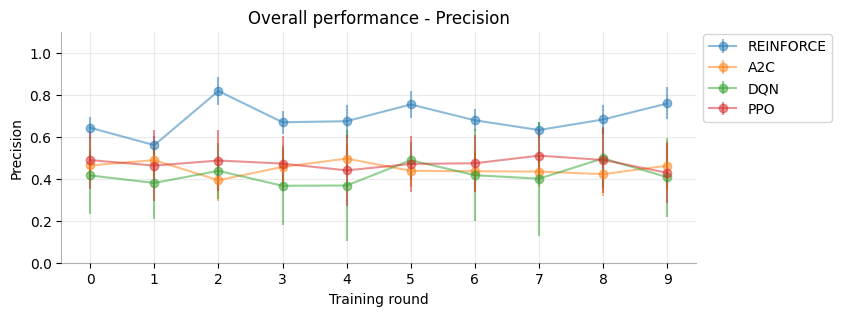

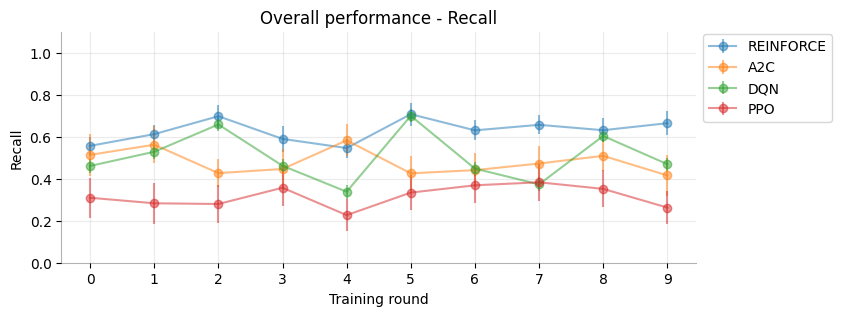

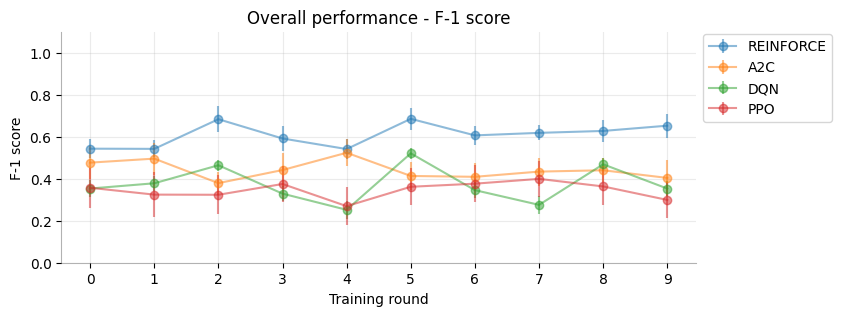

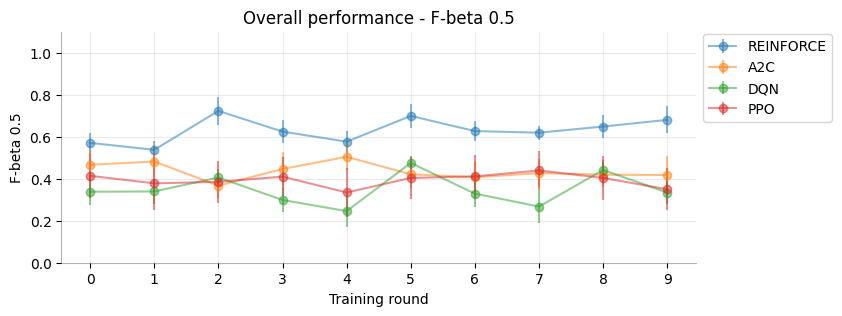

In [151]:
subset = df
env_label = 'Overall performance'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Simulation Environment Dasic 2006

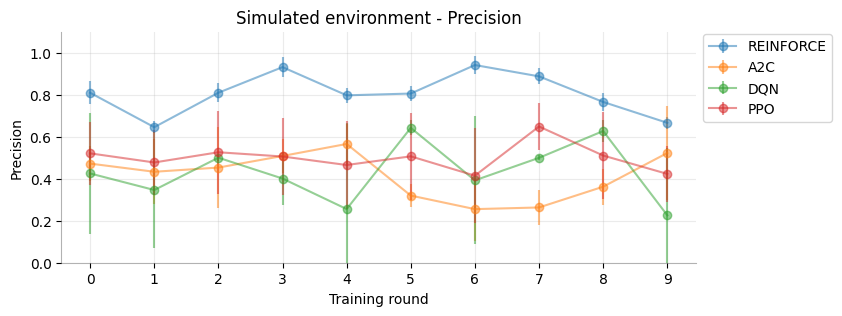

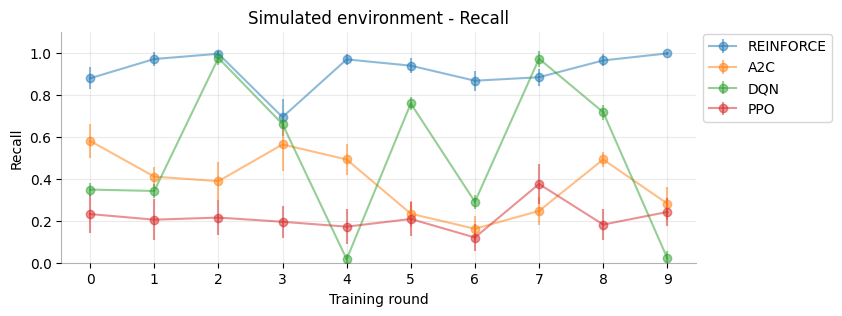

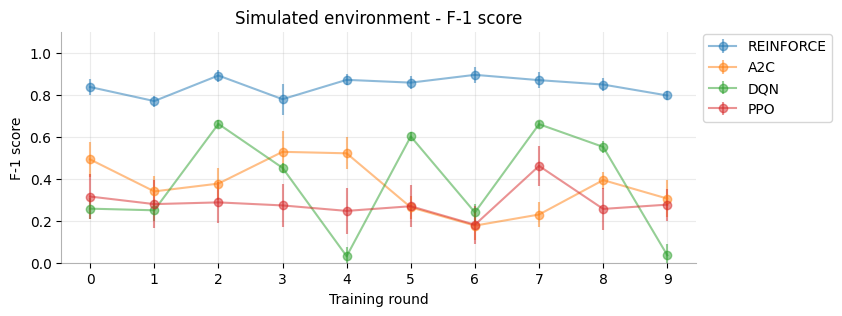

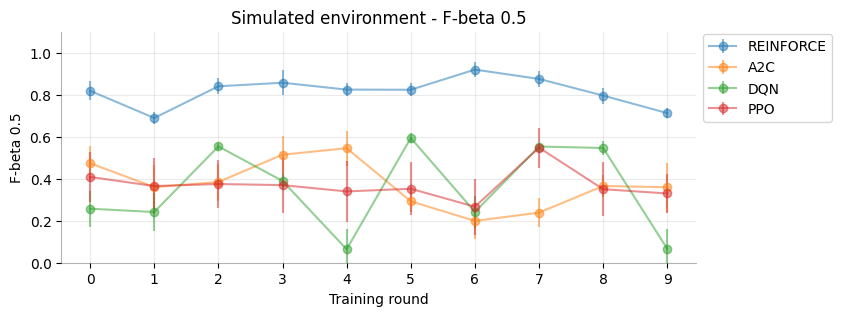

In [152]:
subset = simulated_env
env_label = 'Simulated environment'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Singe state simple env

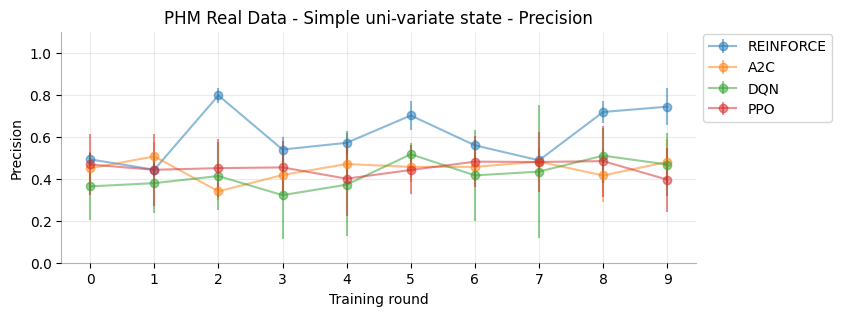

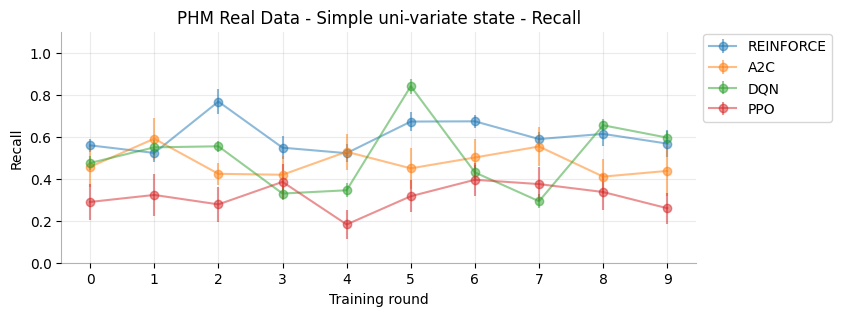

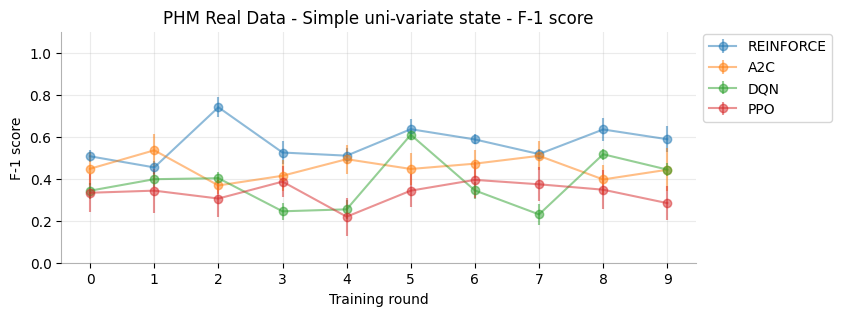

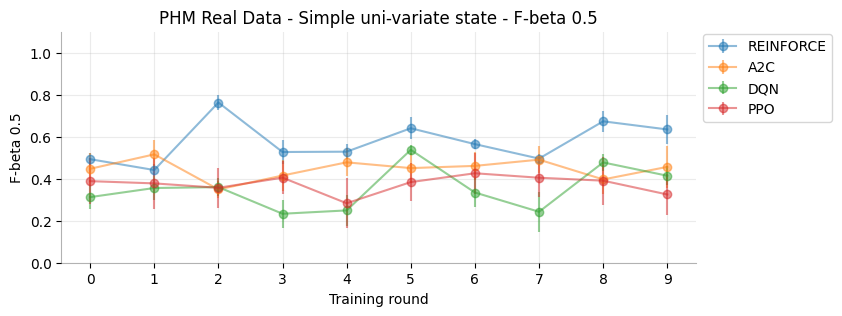

In [153]:
subset = ss_env
env_label = 'PHM Real Data - Simple uni-variate state'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

### Multi-variate state

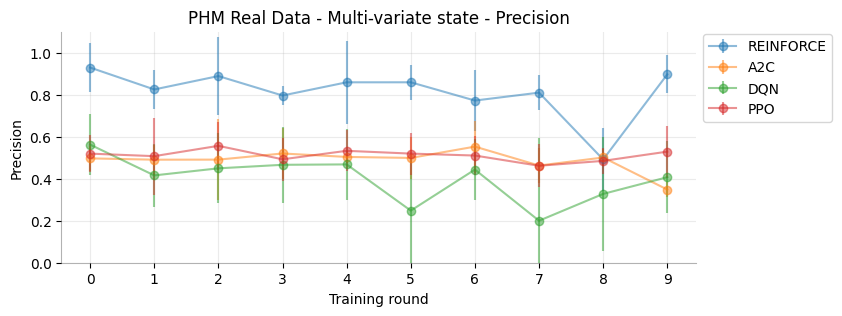

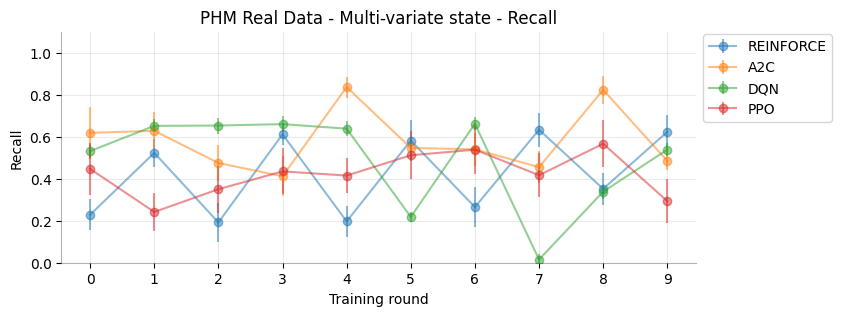

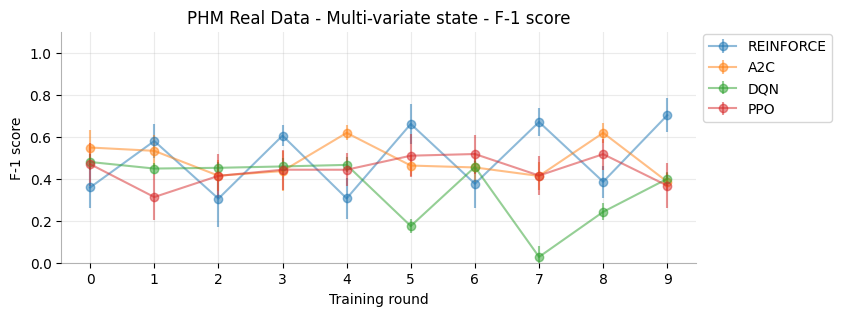

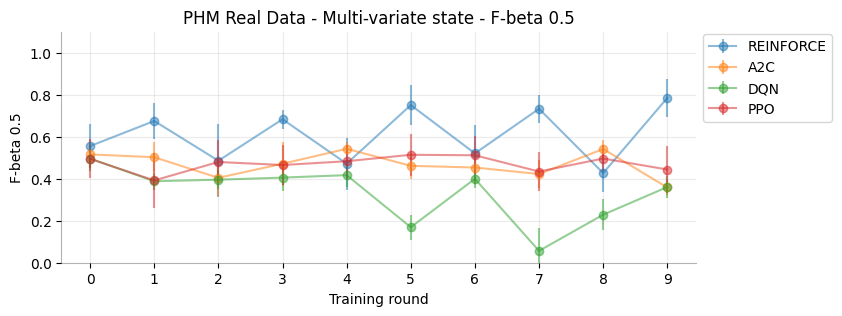

In [154]:
subset = ms_env
env_label = 'PHM Real Data - Multi-variate state'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

## Compute environment specific performance metrics

In [155]:
def compute_performance_df(env_subset):
    # Standard keys and labels
    metric_key = ['Pr', 'Rc', 'F1', 'F05']
    algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
    algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}
    metrics = {'Pr':'Precision', 'Rc':'Recall', 'F1':'F-1 score', 'F05':'F-beta 0.5'}

    # Performance columns
    metric_cols = ['Pr_mean', 'Pr_sd', 'Rc_mean', 'Rc_sd', 'F1_mean', 'F1_sd', 'F05_mean', 'F05_sd']

    # Initiatlize an empty pandas data fram to hold performance mentrics
    performance_df = pd.DataFrame(np.zeros((4, 8)), index=algo_keys)
    performance_df.columns = metric_cols

    # Compute metrics and fill df
    for n in range(len(algo_keys)): 

        for m in range(len(metric_key)):
            m_key = metric_key[m]
            algo_key = algos[algo_keys[n]] 
            algo_label = algo_keys[n]
            mr_key = f'{algo_key}_{m_key}'
            mr_sd_key = f'{algo_key}_{m_key}_sd'

            mr = env_subset.groupby(['Round']).agg({mr_key :['mean']})
            mr_sd = env_subset.groupby(['Round']).agg({mr_sd_key :['mean']})

            mr_mean = np.mean(mr.to_numpy().flatten())
            mr_stddev = np.mean(mr_sd.to_numpy().flatten())

            mean_col = f'{m_key}_mean' 
            sd_col = f'{m_key}_sd'

            performance_df.at[algo_label, mean_col] = mr_mean.round(4)
            performance_df.at[algo_label, sd_col] = mr_stddev.round(4)
    return (performance_df)

In [160]:
# File name where all results will be stored
write_perf_metrics(['Overall Performance'], overall_performance, performance_file, 4)
write_perf_metrics(['Simulated Environment Performance'], simulated_performance, performance_file, 4)
write_perf_metrics(['PHM Real Data - Simple uni-variate state'], phm_ss_performance, performance_file, 4)
write_perf_metrics(['PHM Real Data - Multi-variate state Performance'], phm_ms_performance, performance_file, 4)

## Training times of algorithms across then entire experment

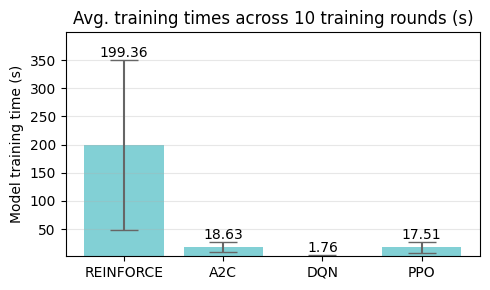

In [161]:
algo_keys = ['REINFORCE', 'A2C', 'DQN', 'PPO']
algos = {'REINFORCE':'RF', 'A2C':'A2C', 'DQN':'DQN', 'PPO':'PPO'}

RF_training_time = all_envs.agg({'RF_time':['mean','std']})
A2C_training_time = all_envs.agg({'A2C_time':['mean','std']})
DQN_training_time = all_envs.agg({'DQN_time':['mean','std']})
PPO_training_time = all_envs.agg({'PPO_time':['mean','std']})

# Create lists for the plot
x_pos = np.arange(len(algo_keys))
mean_training_time = [RF_training_time['RF_time']['mean'], A2C_training_time['A2C_time']['mean'], 
                      DQN_training_time['DQN_time']['mean'], PPO_training_time['PPO_time']['mean']]
error = [RF_training_time['RF_time']['std'], A2C_training_time['A2C_time']['std'], 
                      DQN_training_time['DQN_time']['std'], PPO_training_time['PPO_time']['std']]



# Build the plot
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(5)

max_y_lim = max(mean_training_time) + 200
min_y_lim = min(mean_training_time)
plt.ylim(min_y_lim, max_y_lim)

bars = ax.bar(x_pos, mean_training_time, yerr=error, align='center', alpha=0.5, color='#06A2AC', ecolor = '0.4', capsize=10)
ax.set_ylabel('Model training time (s)')
ax.set_xticks(x_pos)
ax.set_xticklabels(algo_keys)
ax.set_title('Avg. training times across 10 training rounds (s)')
ax.yaxis.grid(True, alpha=0.30)
ax.bar_label(bars, fmt='%.2f', label_type='edge')

# Save the figure and show
plt.tight_layout()
plt.savefig('Model_training_time.pdf', bbox_inches='tight')
plt.show()

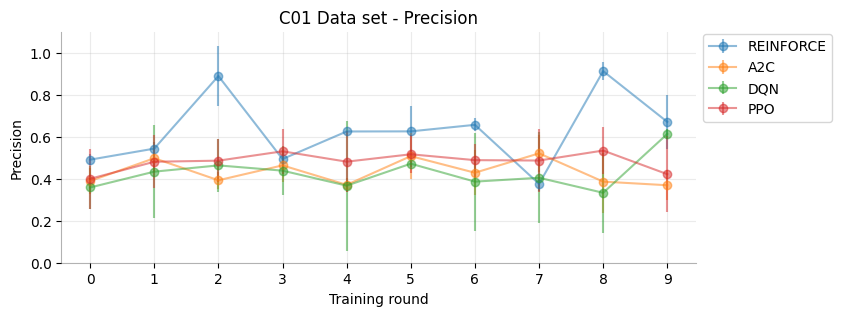

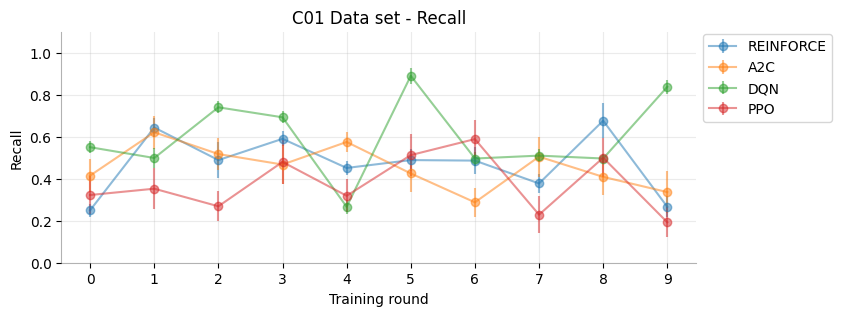

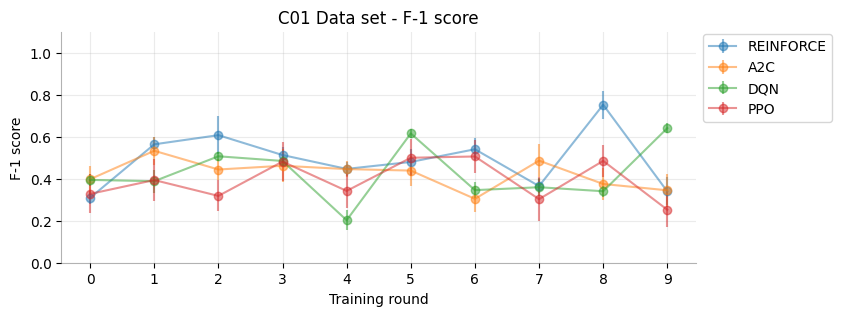

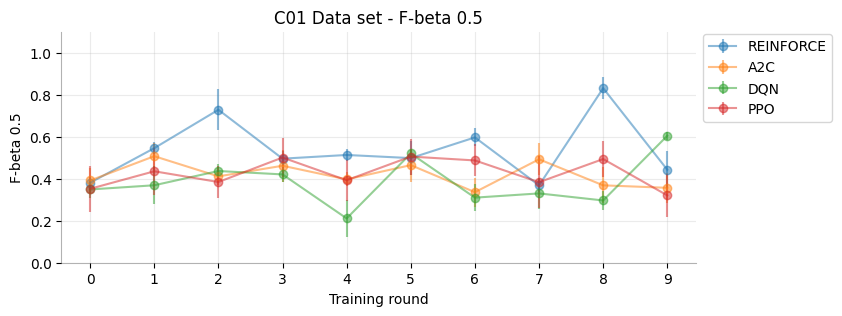

In [162]:
subset = C01
env_label = 'C01 Data set'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

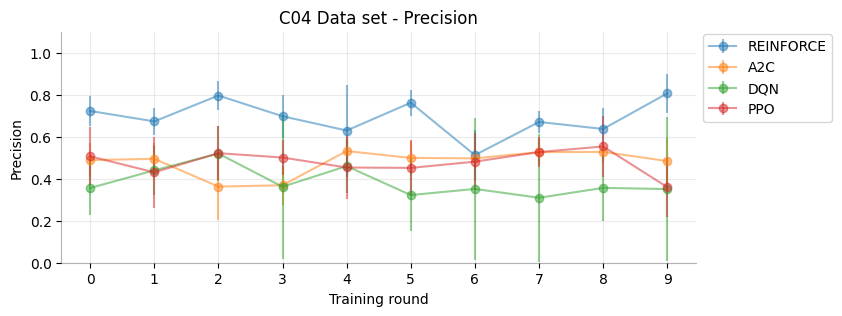

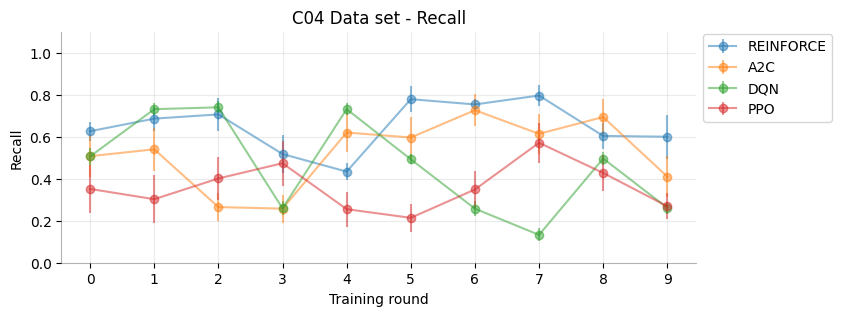

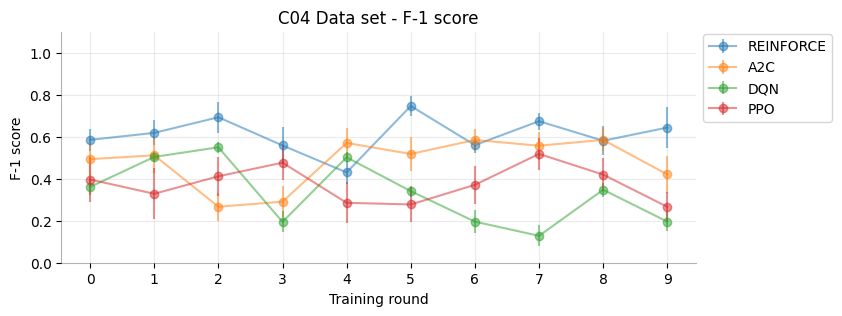

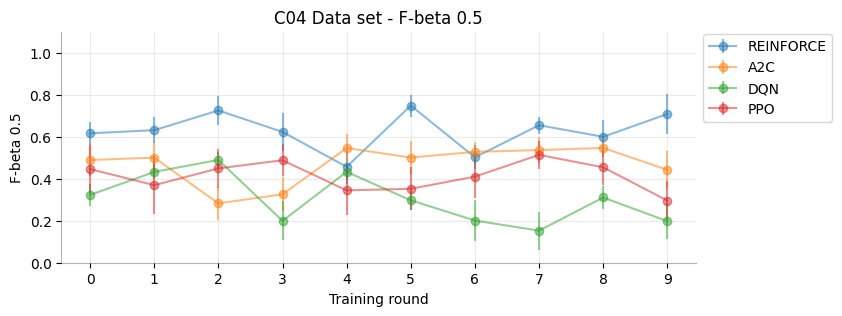

In [163]:
subset = C04
env_label = 'C04 Data set'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

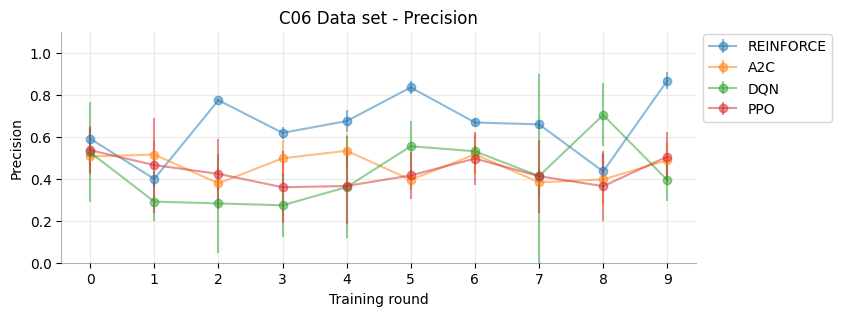

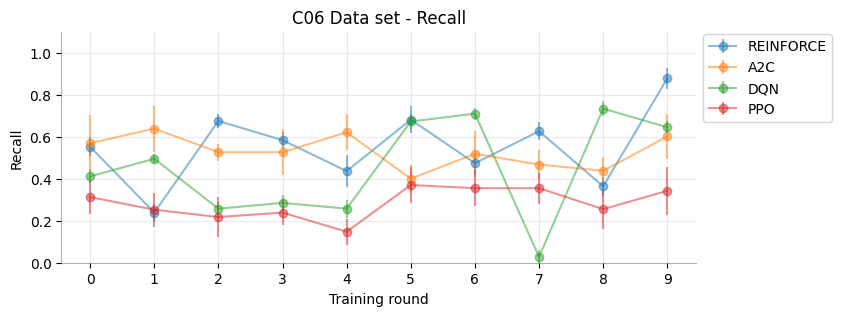

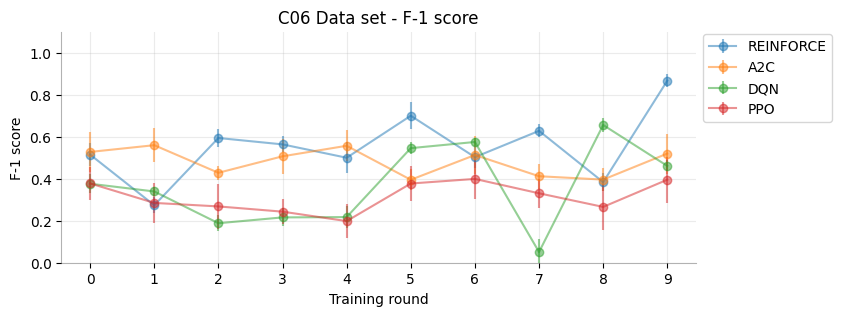

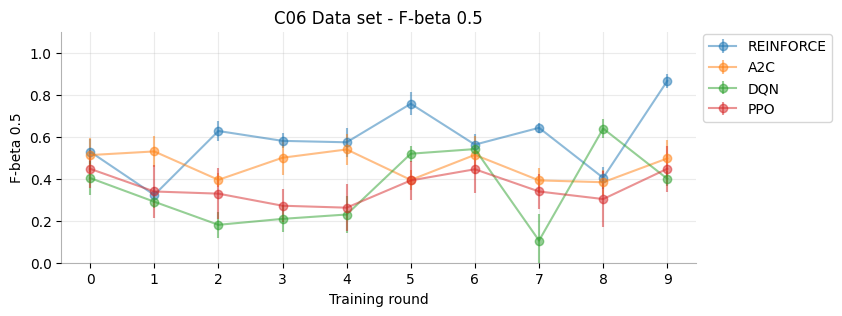

In [164]:
subset = C06
env_label = 'C06 Data set'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

In [165]:
C01_performance = compute_performance_df(C01)
C04_performance = compute_performance_df(C04)
C06_performance = compute_performance_df(C06)

In [166]:
C01_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6283,0.0594,0.4719,0.0528,0.4917,0.0507,0.5401,0.0516
A2C,0.4326,0.0804,0.4559,0.0817,0.4231,0.0664,0.4187,0.0659
DQN,0.4269,0.1553,0.5978,0.0326,0.4278,0.0328,0.3847,0.0513
PPO,0.4825,0.1236,0.3765,0.0884,0.3909,0.0876,0.4256,0.0962


In [167]:
C04_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6907,0.0957,0.6502,0.0609,0.6089,0.0619,0.6265,0.0685
A2C,0.4781,0.0819,0.5230,0.0887,0.4798,0.0720,0.4698,0.0706
DQN,0.3827,0.2160,0.4608,0.0316,0.3318,0.0370,0.3036,0.0629
PPO,0.4787,0.1291,0.3614,0.0921,0.3750,0.0898,0.4123,0.0985


In [168]:
C06_performance

,Pr_mean,Pr_sd,Rc_mean,Rc_sd,F1_mean,F1_sd,F05_mean,F05_sd
REINFORCE,0.6520,0.0378,0.5509,0.0491,0.5527,0.0471,0.5864,0.0464
A2C,0.4608,0.0758,0.5306,0.0899,0.4814,0.0720,0.4657,0.0691
DQN,0.4328,0.1841,0.4495,0.0328,0.3625,0.0371,0.3517,0.0593
PPO,0.4342,0.1555,0.2846,0.0836,0.3140,0.0892,0.3576,0.1058


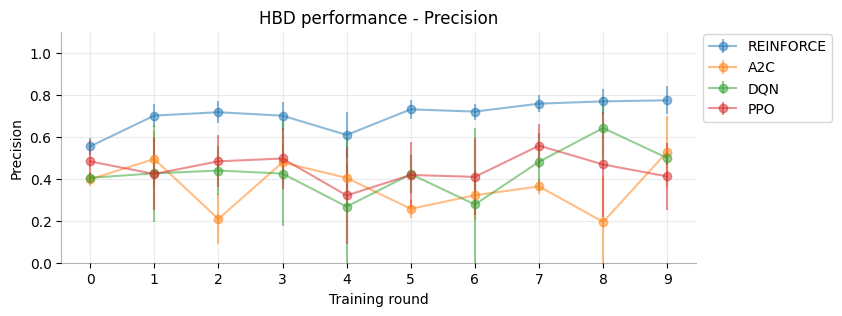

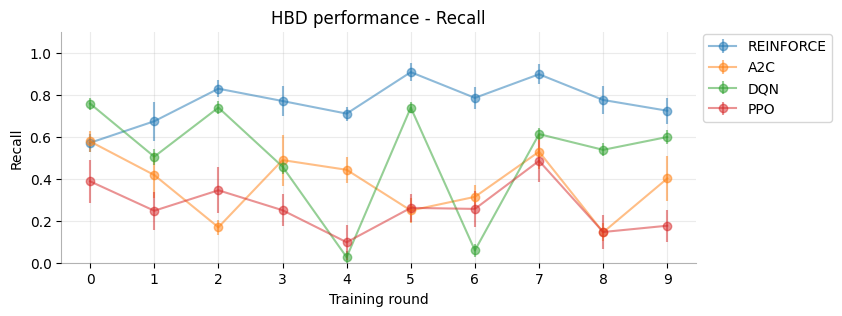

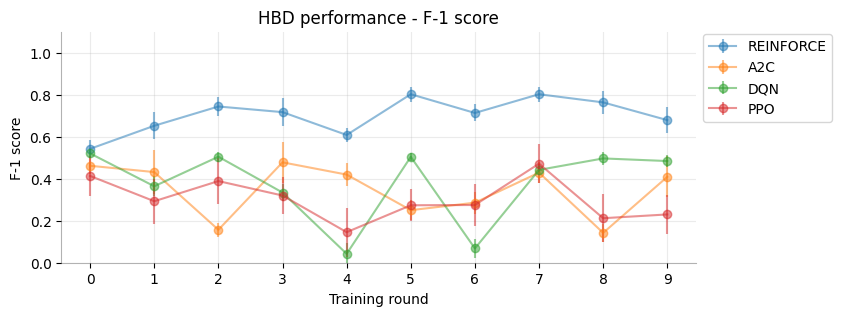

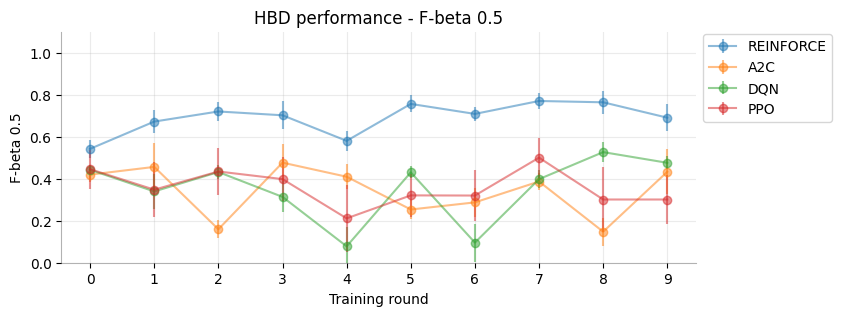

In [169]:
subset = HBD
env_label = 'HBD performance'
multi_algorithm_plot(env_subset=subset, env_label=env_label)

# Statistical Tests

For the null hypothesis, assuming sample means are equal:

* Reject the null hypothesis if p-value <= alpha
* Fail to reject the null hypothesis if p-value > alpha
* Reject or fail to reject each hypothesis based on the result

The results indicate a p-value of 0.04, which is less than alpha=0.05, rejecting the null hypothesis. So this two-sample t-test concludes that the mean of the first sample is either greater or less than the mean of the second sample.

In [2]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import glob

In [5]:
def read_reports(file_pattern):
    report_files = glob.glob(file_pattern, recursive = True)
    print(f'Reading {file_pattern}. Files: {len(report_files)}')
    dfes = [pd.read_csv(f, header = 0) for f in report_files]
    df_report = pd.concat(dfes)
    return (df_report)

In [77]:
def stat_test(category, RF, SB, algo, metric):
    
    alpha = 0.05
    t_stat, p_value = stats.ttest_ind(RF, SB)
    
    RF_mean = RF.mean()
    SB_mean = SB.mean()
    A = f'RF_{metric}'
    B = f'{algo}_{metric}'
    print(f'Mean of {A} {RF_mean:.4f}  |  {B}  {SB_mean:.4f} - sample: {len(RF)} {len(SB)}')
    
    print(f'T-stat : {t_stat:.2f}  P-Value: {p_value:.2e} - at alpha/2: {alpha/2}')  
 
    # Reject or fail to reject your null hypothesis H0.
    if (p_value < alpha):
        
        conclusion_2t = f'2-t test: Reject Ho | {A} n.eq. {B}'
    else:
        conclusion_2t = f'2-t test: FAIL to reject Ho | {A} ~ {B}'

    if ((p_value/2 < alpha) and t_stat > 0.0):        
        conclusion_1t = f'1-t test: Reject Ho | {A} > {B}'
    else:
        conclusion_1t = f'1-t test: FAIL to reject Ho | {A} <= {B}'
        
    print(conclusion_2t)
    print(conclusion_1t)
    
    results = {'Category':category, 'RF_metric':A, 'SB3_metric':B, 'SB3_Algorithm':algo, 'Metric':metric, 'RF_mean':RF.mean(), 
               'SB_mean':SB.mean(), 'RF_samples':len(RF), 'SB_samples':len(SB), 'alpha':alpha, 't_stat':t_stat, 'p_value':p_value, 
               'Conclusion_2t':conclusion_2t, 'Conclusion_1t':conclusion_1t}
    # results = [category, A, B, algo, metric, RF.mean(), SB.mean(), len(RF), len(SB), alpha, t_stat, p_value, conclusion_2t, conclusion_1t]
    return (results)

In [86]:
PATH = './results/07-Jul-2023_Results/**/'
t_Test_Results = f'./results/07-Jul-2023_Results/t_Test_Results.csv'

ALL_TEST_REPORTS = f'{PATH}/*_test_results*.csv'
DASIC_REPORTS = f'{PATH}/*_Dasic_*test_results*.csv'
PHM_SS_REPORTS = f'{PATH}/*_PHM_???_SS_*test_results*.csv'
PHM_MS_REPORTS = f'{PATH}/*_PHM_???_MS_*test_results*.csv'
PHM_C01_REPORTS = f'{PATH}/*_PHM_C01_*test_results*.csv'

In [87]:
metrics = ['Precision', 'Recall', 'F_1_Score']
algo_keys = ['A2C', 'DQN', 'PPO']
subsets = [ALL_TEST_REPORTS, DASIC_REPORTS, PHM_SS_REPORTS, PHM_MS_REPORTS]
category = ['Overall', 'Simulated', 'PHM-SS', 'PHM-MS']

In [88]:
column_names = ['Category', 'RF_metric', 'SB3_metric', 'SB3_Algorithm', 'Metric', 'RF_mean', 'SB_mean', 'RF_samples',
                'SB_samples', 'alpha', 't_stat', 'p_value', 'Conclusion_2t', 'Conclusion_1t']
df_t_test = pd.DataFrame(columns=column_names)
df_t_test

,Category,RF_metric,SB3_metric,SB3_Algorithm,Metric,RF_mean,SB_mean,RF_samples,SB_samples,alpha,t_stat,p_value,Conclusion_2t,Conclusion_1t


In [89]:
for catg in category:
    print(f'\n*** {catg} ***')
    catg_idx = category.index(catg)
    df_report = read_reports(subsets[catg_idx])
    for m in metrics:
        RF = df_report[df_report['Algorithm'] == 'REINFORCE'][m]
        print(80*'=')
        for algo in algo_keys:
            print(f'- Conducting Hypothesis Test for {algo} - {m}')
            SB = df_report[df_report['Algorithm'] == algo][m]
            results = stat_test(catg, RF, SB, algo, m)
            df_dictionary = pd.DataFrame([results])
            df_t_test = pd.concat([df_t_test, df_dictionary], ignore_index=True)
            print(80*'-')


*** Overall ***
Reading ./results/07-Jul-2023_Results/**//*_test_results*.csv. Files: 151
- Conducting Hypothesis Test for A2C - Precision
Mean of RF_Precision 0.6868  |  A2C_Precision  0.4488 - sample: 1500 1500
T-stat : 25.07  P-Value: 4.31e-126 - at alpha/2: 0.025
2-t test: Reject Ho | RF_Precision n.eq. A2C_Precision
1-t test: Reject Ho | RF_Precision > A2C_Precision
--------------------------------------------------------------------------------
- Conducting Hypothesis Test for DQN - Precision
Mean of RF_Precision 0.6868  |  DQN_Precision  0.4176 - sample: 1500 1500
T-stat : 23.17  P-Value: 2.17e-109 - at alpha/2: 0.025
2-t test: Reject Ho | RF_Precision n.eq. DQN_Precision
1-t test: Reject Ho | RF_Precision > DQN_Precision
--------------------------------------------------------------------------------
- Conducting Hypothesis Test for PPO - Precision
Mean of RF_Precision 0.6868  |  PPO_Precision  0.4721 - sample: 1500 1500
T-stat : 22.80  P-Value: 2.81e-106 - at alpha/2: 0.025
2

In [90]:
df_t_test.head()
df_t_test.to_csv(t_Test_Results)
print(f'Done writing t-test results to {t_Test_Results}')

Done writing t-test results to ./results/07-Jul-2023_Results/t_Test_Results.csv


In [ ]:
    # print(f"std dev of {A} {RF_Pr.std():.4f}  {B}  {DQN_Pr.std():.4f}")
    # print("p-value < alpha => Mean of the first sample is either > or < mean of the second sample")

    # if ((p_value/2 < alpha) and t_stat > 0.0):
    #     print(f'** Ha true: {A} >  {B} ')


### Basics of t-test
```
    A: [1.2, 1.2, 1.4, 1.05] | B: [6.12, 7.72, 8.4, 6.05]
    T-stat : -9.9098
    alpha/2: 0.025
    P-Value: 0.0001
    mean of A 1.2125  B 7.0725
    *2-t test* Ha true: A > or < B
    *1-t test* Ho true: A <= B


    A: [1.2, 1.2, 1.4, 1.05] | B: [1.201, 1.204, 1.403, 1.035]
    T-stat : 0.0168
    alpha/2: 0.025
    P-Value: 0.9871
    mean of A 1.2125  B 1.2107
    *2-t test* Ho true: A ~ B
    *1-t test* Ho true: A <= B


    A: [1.2, 1.2, 1.4, 1.05] | B: [0.01, 0.12, 0.004, 0.09]
    T-stat : 14.9358
    alpha/2: 0.025
    P-Value: 0.0000
    mean of A 1.2125  B 0.0560
    *2-t test* Ha true: A > or < B
    *1-t test* Ha true: A > B
```

In [ ]:
print('Given p and t values from a **two-tailed test**, you would reject the null hypothesis Ho:RF_Pr = PPO_Pr\nof a greater-than test Ha: RF_Pr > PPO_Pr when p/2 < alpha and t > 0,\nand of a less-than test when p/2 < alpha and t < 0')
#p-value < alpha => Mean of the first sample is either > or < mean of the second sampleld reject the null hypothesis of a greater-than test when p/2 < alpha and t > 0, and of a less-than test when p/2 < alpha and t < 0")


A = [1.2, 1.2, 1.4, 1.05]
# B = [1.201, 1.204, 1.403, 1.035]
# B = [6.12, 7.72, 8.4, 6.05]
B = [0.01, 0.12, 0.004, 0.09]

alpha = 0.05
t_stat, p_value = stats.ttest_ind(A, B)

print(f"A: {A} | B: {B}")  

print(f"T-stat : {t_stat:.4f}")  
print(f"alpha/2: {alpha/2}")
print(f"P-Value: {p_value:.4f}")

print(f"mean of A {np.average(A):.4f}  B {np.average(B):.4f}")

if (p_value < alpha):
    print('*2-t test* Ha true: A > or < B')
else:
    print('*2-t test* Ho true: A ~ B')
    
if ((p_value/2 < alpha) and t_stat > 0.0):
    print('*1-t test* Ha true: A > B')
else:
    print('*1-t test* Ho true: A <= B')

## Visualize the PHM Multivariate data

In [29]:
MSdata = './data/PHM_Tool_Wear_Data_C06_0p13.csv'

columns = ['force_x', 'force_y', 'force_z', 'vibration_x', 'vibration_y', 'vibration_z', 'acoustic_emission_rms', 'tool_wear']
df = pd.read_csv(MSdata, usecols=columns)
print(len(df))

34674


In [39]:
df_ms = df.iloc[::100, :]

print(len(df_ms))

347


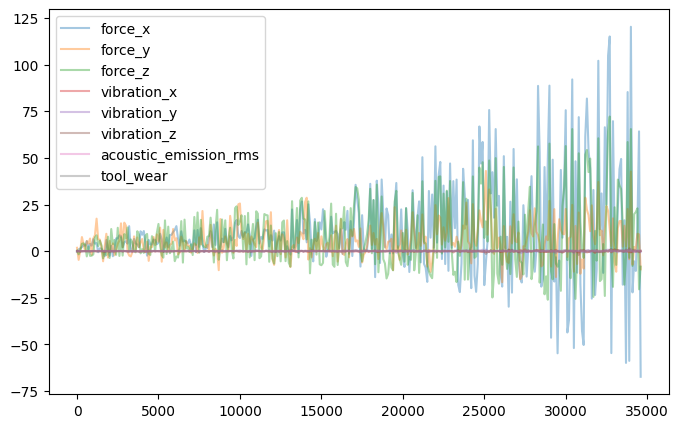

In [43]:
# Create unstacked multiple columns bar
plot = df_ms.plot(kind='line', alpha=0.4, figsize = (8, 5))
plot.get_figure().savefig('PHMMSdata.pdf', format='pdf')

<Axes: >

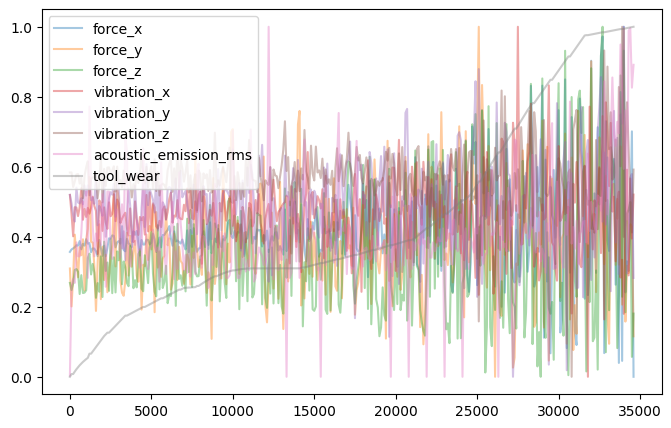

In [25]:
df_msn = (df_ms-df_ms.min())/(df_ms.max()-df_ms.min())
df_msn.plot(kind='line', alpha=0.4, figsize = (8, 5))